# Importing Libraries

In [1]:
#importing the dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Load the file with questions and answers
data= pd.read_csv('Questions_ans.csv')
data.head()

,Questions,Answers,Labels
0,What do you mean by Clustering?,Clustering is an unsupervised machine learning...,Hierarchial
1,What is a Hierarchical Clustering Algorithm?,"Hierarchical Clustering i.e, an unsupervised m...",Hierarchial
2,What are the various types of Hierarchical Clu...,The two different types of Hierarchical Cluste...,Hierarchial
3,Explain the Agglomerative Hierarchical Cluster...,"Initially, each data point is considered as an...",Hierarchial
4,Describe the Divisive Hierarchical Clustering ...,"In simple words, Divisive Hierarchical Cluster...",Hierarchial


## EDA

 
** Total no of Questions in the Database 	 -	"166"

** Total number of Topics in the Database 	 -	"9"

Total no of Questions in each Topic :

Decision tree    25
Random_forest    22
k_means          21
Logistic         21
Hierarchial      20
KNN              20
SVM              15
NAÏVE BAYES      12
PCA              10
Name: Labels, dtype: int64


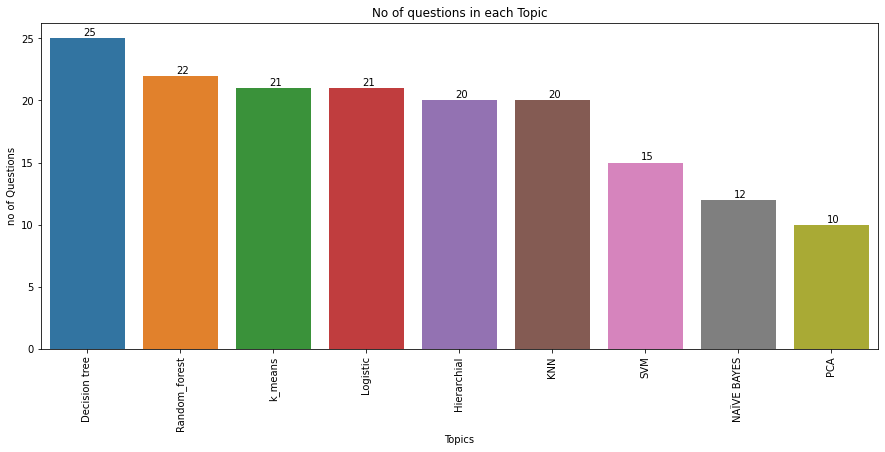

In [3]:
print(' ')
print(
    f'\033[1m** Total no of Questions in the Database \t -\t\033[7m"{len(data)}"\033[0m',
    end='\n\n')
print(
    f'\033[1m** Total number of Topics in the Database \t -\t\033[7m"{len(data.Labels.unique())}"\033[0m',
    end='\n\n')
print(f'\033[7m\033[95mTotal no of Questions in each Topic :\033[0m',
      end='\n\n')
print(data.Labels.value_counts())
plt.figure(figsize=(15, 6))
sns.barplot(x=data.Labels.value_counts().index,
            y=data.Labels.value_counts())
plt.title('No of questions in each Topic')
plt.xlabel('Topics')
plt.ylabel('no of Questions')
plt.xticks(rotation=90)
for index, value in enumerate(data.Labels.value_counts()):
    plt.text(index-.05, value+.2, str(value))
plt.show()

In [4]:
# Creating data for EDA
EDAdata = data.copy()
EDAdata['Question_len'] = EDAdata.Questions.apply(len)
EDAdata['Q_no'] = EDAdata.index
EDAdata['Answer_len'] = EDAdata.Answers.apply(len)
EDAdata.head()

,Questions,Answers,Labels,Question_len,Q_no,Answer_len
0,What do you mean by Clustering?,Clustering is an unsupervised machine learning...,Hierarchial,31,0,289
1,What is a Hierarchical Clustering Algorithm?,"Hierarchical Clustering i.e, an unsupervised m...",Hierarchial,44,1,363
2,What are the various types of Hierarchical Clu...,The two different types of Hierarchical Cluste...,Hierarchial,54,2,335
3,Explain the Agglomerative Hierarchical Cluster...,"Initially, each data point is considered as an...",Hierarchial,88,3,489
4,Describe the Divisive Hierarchical Clustering ...,"In simple words, Divisive Hierarchical Cluster...",Hierarchial,66,4,607


# Length of questions in DATABASE

In [9]:
temp = EDAdata.sort_values(by = 'Question_len',ascending = False)
print(" ")
print(f'\033[7m\033[92m\033[1m Longest Question in DATABASE is Question no {temp.iloc[0,4]} with a length of {temp.iloc[0,3]} \033[0m',end='\n\n')
print(f'\033[1m\033[7m\033[92m Shortest Question in DATABASE is Question no {temp.iloc[-1,4]} with a length of {temp.iloc[-1,3]} \033[0m',end='\n\n')
plt.figure(figsize=(18,8),dpi = 600)
sns.barplot(x = temp.Q_no.apply(str), y = temp.Question_len)
plt.xticks(rotation = 90,fontsize = 8)
plt.title(f'Length of each question in the DATABASE',fontsize = 16)
plt.xlabel('Question number',fontsize = 14)
plt.ylabel('Question Length',fontsize = 14)
for index,val in enumerate(temp.Question_len):
    plt.text(index-.2,val+1.5,str(val),fontsize = 9,rotation = 90)
plt.tight_layout()
plt.show()

 
 Longest Question in DATABASE is Question no 133 with a length of 212 

 Shortest Question in DATABASE is Question no 45 with a length of 19 



In [6]:
print('\033[1m Longest question is:\n \033[0m',(EDAdata._get_value(133,'Questions')))
print()
print('\033[1m Shortest question is:\n \033[0m',(EDAdata._get_value(45,'Questions')))

 Longest question is:
  If it takes one hour to train a Decision Tree on a training set containing 1 million instances, roughly how much time will it take to train another Decision Tree on a training set containing 10 million instances?

 Shortest question is:
  Limitations of PCA?


# Analyzing Length of each question by Topic

 
 Longest Question in Hierarchial is Question no 14 with a length of 148 

 Shortest Question in Hierarchial is Question no 0 with a length of 31 



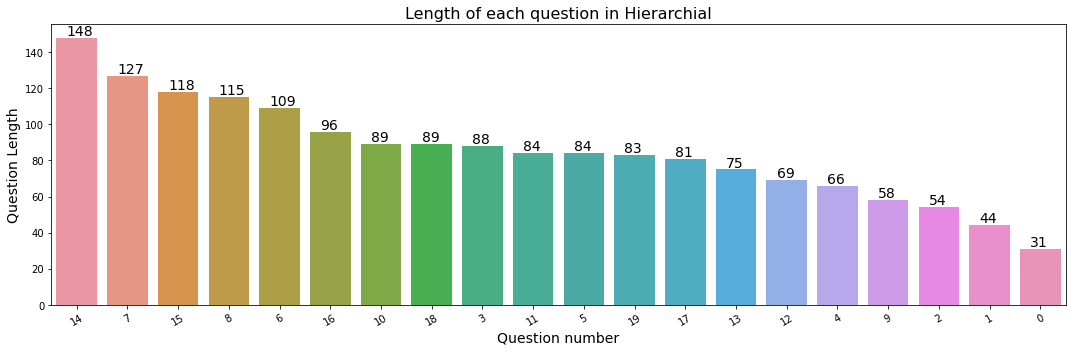

 
 Longest Question in k_means is Question no 24 with a length of 203 

 Shortest Question in k_means is Question no 20 with a length of 37 



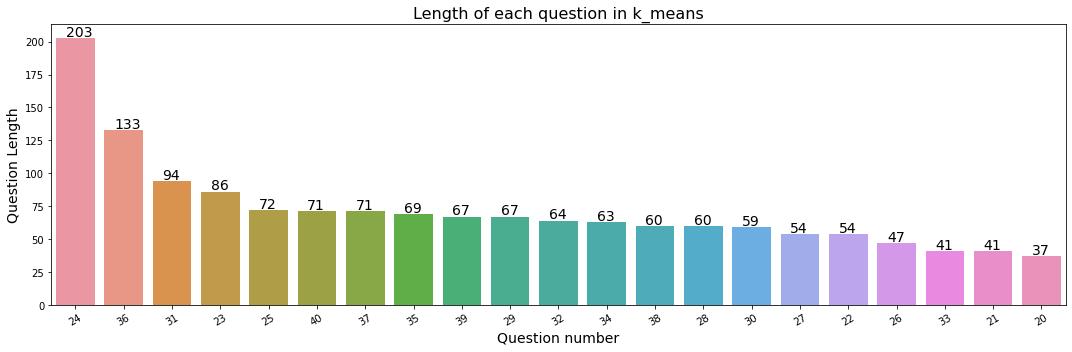

 
 Longest Question in PCA is Question no 46 with a length of 96 

 Shortest Question in PCA is Question no 45 with a length of 19 



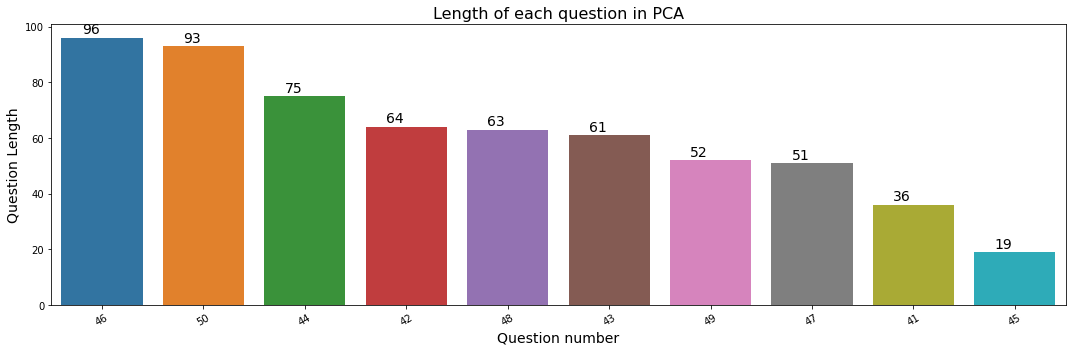

 
 Longest Question in Random_forest is Question no 63 with a length of 110 

 Shortest Question in Random_forest is Question no 54 with a length of 28 



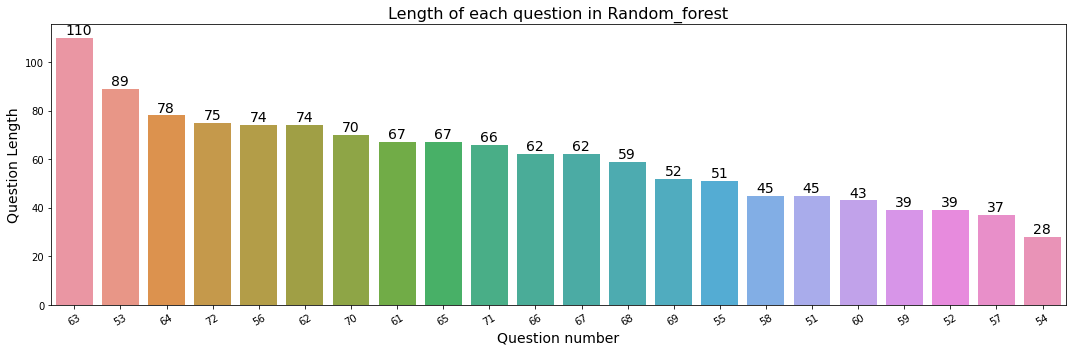

 
 Longest Question in SVM is Question no 86 with a length of 190 

 Shortest Question in SVM is Question no 83 with a length of 25 



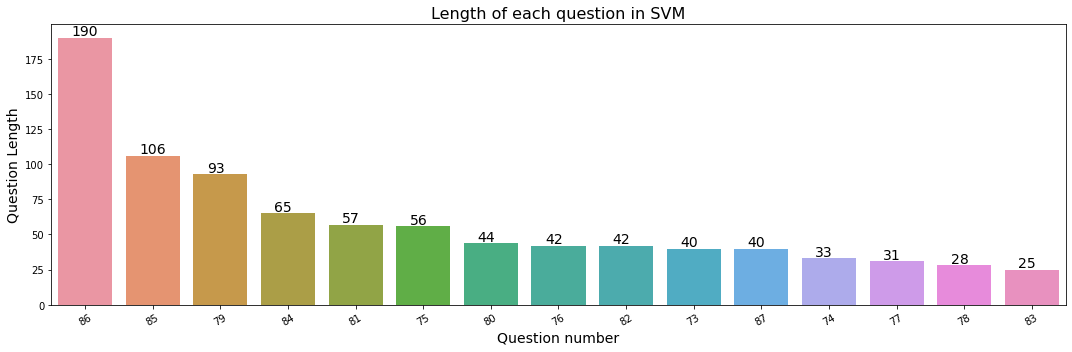

 
 Longest Question in KNN is Question no 103 with a length of 104 

 Shortest Question in KNN is Question no 88 with a length of 26 



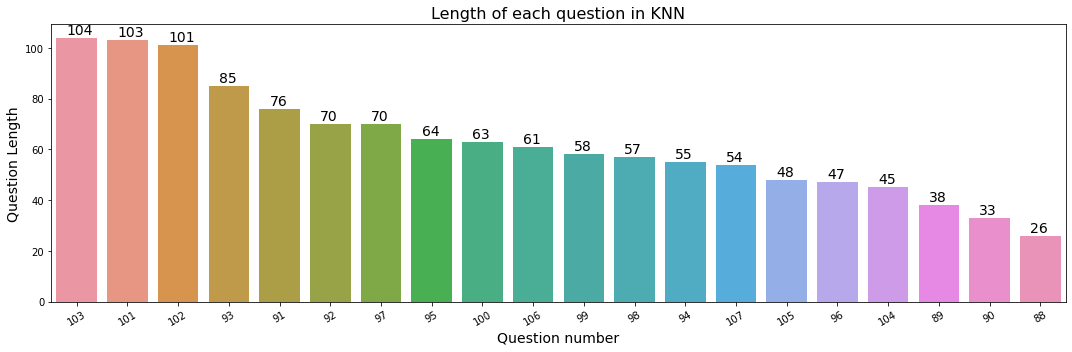

 
 Longest Question in NAÏVE BAYES is Question no 115 with a length of 90 

 Shortest Question in NAÏVE BAYES is Question no 109 with a length of 22 



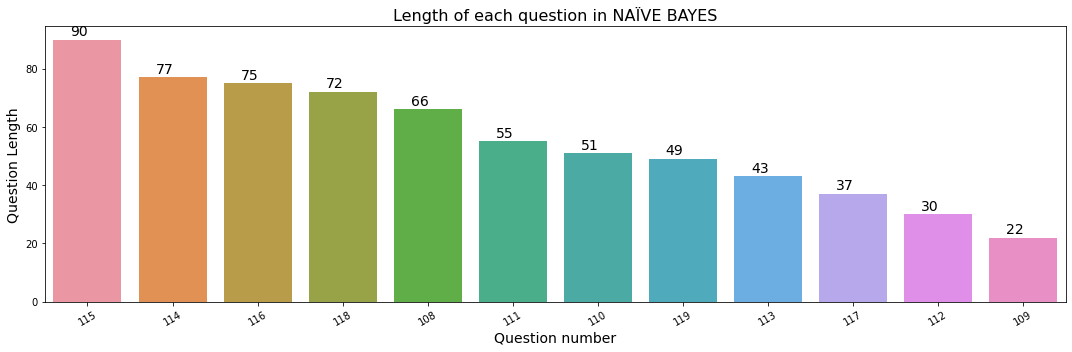

 
 Longest Question in Decision tree is Question no 133 with a length of 212 

 Shortest Question in Decision tree is Question no 120 with a length of 36 



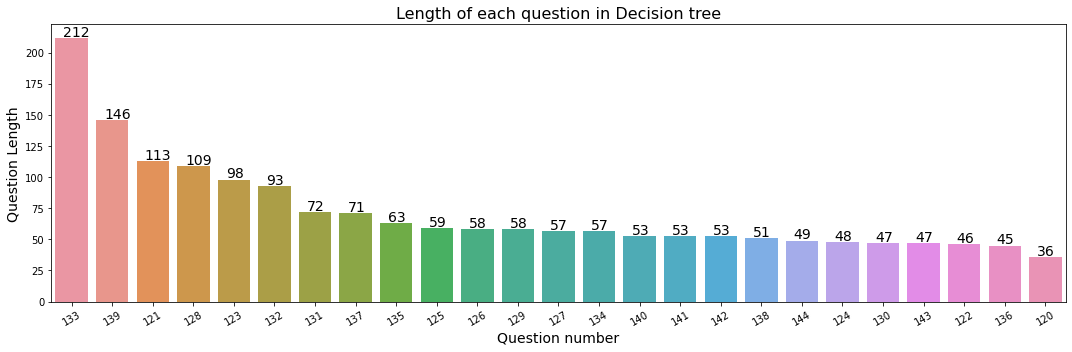

 
 Longest Question in Logistic is Question no 154 with a length of 106 

 Shortest Question in Logistic is Question no 148 with a length of 19 



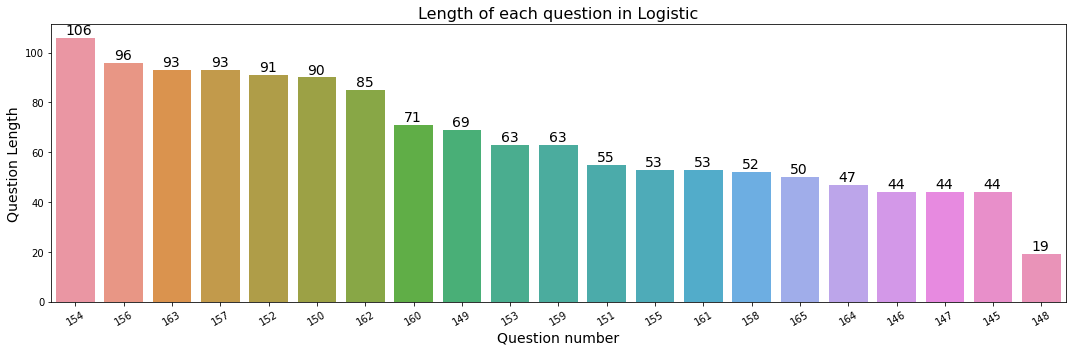

In [7]:
for label in data.Labels.unique():
    temp = EDAdata[EDAdata.Labels == label]
    temp = temp.sort_values(by = 'Question_len', ascending = False)
    print(" ")
    print(f'\033[7m\033[92m\033[1m Longest Question in {label} is Question no {temp.iloc[0,4]} with a length of {temp.iloc[0,3]} \033[0m',end='\n\n')
    print(f'\033[1m\033[7m\033[92m Shortest Question in {label} is Question no {temp.iloc[-1,4]} with a length of {temp.iloc[-1,3]} \033[0m',end='\n\n')
    plt.figure(figsize=(15,5))
    sns.barplot(x = temp.Q_no.apply(str), y = temp.Question_len)
    plt.xticks(rotation = 30)
    plt.title(f'Length of each question in {label}',fontsize = 16)
    plt.xlabel('Question number',fontsize = 14)
    plt.ylabel('Question Length',fontsize = 14)
    for index,val in enumerate(temp.Question_len):
        plt.text(index-.2,val+1.5,str(val),fontsize = 14)
    plt.tight_layout()
    plt.show()

# Length of Answers in the DATABASE

In [8]:
temp = EDAdata.sort_values(by = 'Answer_len',ascending = False)
print(" ")
print(f'\033[7m\033[92m\033[1m Longest Answer in DATABASE is for Question no {temp.iloc[0,4]} with a length of {temp.iloc[0,5]} \033[0m',end='\n\n')
print(f'\033[1m\033[7m\033[92m Shortest Answer in DATABASE is for Question no {temp.iloc[-1,4]} with a length of {temp.iloc[-1,5]} \033[0m',end='\n\n')
plt.figure(figsize=(18,8),dpi = 600)
sns.barplot(x = temp.Q_no.apply(str), y = temp.Answer_len)
plt.xticks(rotation = 90,fontsize = 8)
plt.title(f'Length of each answer in the DATABASE',fontsize = 16)
plt.xlabel('Question number',fontsize = 14)
plt.ylabel('Answer Length',fontsize = 14)
for index,val in enumerate(temp.Answer_len):
    plt.text(index-.3,val+4,str(val),fontsize = 9,rotation = 90)
plt.tight_layout()
plt.show()

 
 Longest Answer in DATABASE is for Question no 147 with a length of 3044 

 Shortest Answer in DATABASE is for Question no 65 with a length of 100 



In [10]:
print('\033[1m Longest answer is:\n \033[0m',(EDAdata._get_value(147,'Answers')))
print()
print('\033[1m Shortest answer is:\n \033[0m',(EDAdata._get_value(65,'Answers')))

 Longest answer is:
  
By using the training dataset, we can find the dependent(x) and independent variables(y), so if we can determine the parameters w (Normal) and b (y-intercept), then we can easily find a decision boundary that can almost separate both the classes in a linear fashion.

Objective:

In order to train a Logistic Regression model, we just need w and b to find a line(in 2D), plane(3D), or hyperplane(in more than 3-D dimension) that can separate both the classes point as perfect as possible so that when it encounters with any new unseen data point, it can easily classify, from which class the unseen data point belongs to.

For Example, Let us consider we have only two features as x1 and x2.

Let’s take any of the +ve class points (figure below) and find the shortest distance from that point to the plane. Here, the shortest distance is computed using:

di = wT*xi / ||w||

If weight vector is a unit vector i.e, ||w||=1. Then,

di = wT*xi

Since w and xi are on the same sid

# Analyzing Length of each Answer by Topic

 
 Longest Answer in Hierarchial is for Question no 16 with a length of 1767 

 Shortest Answer in Hierarchial is for Question no 14 with a length of 212 



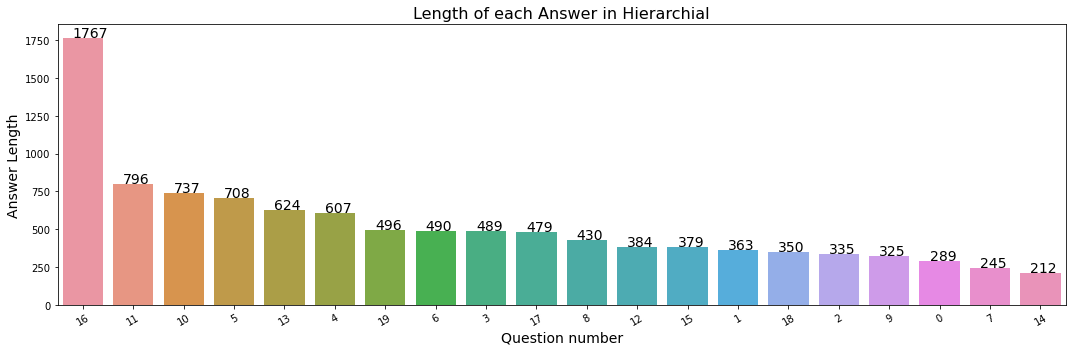

 
 Longest Answer in k_means is for Question no 34 with a length of 1078 

 Shortest Answer in k_means is for Question no 27 with a length of 177 



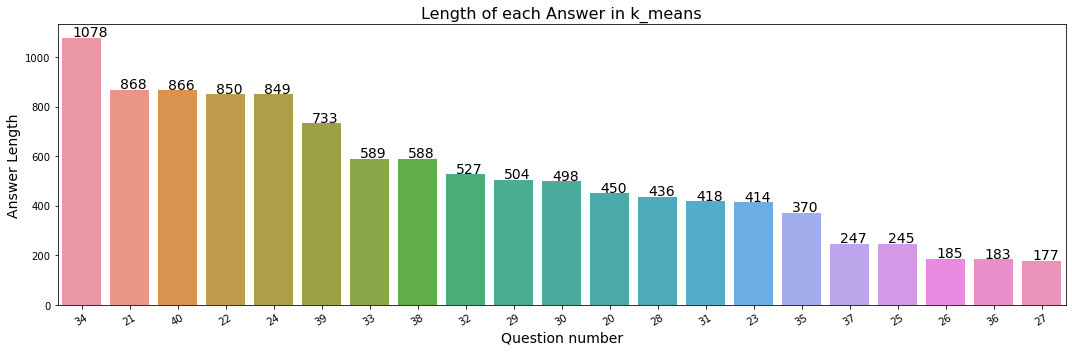

 
 Longest Answer in PCA is for Question no 43 with a length of 980 

 Shortest Answer in PCA is for Question no 48 with a length of 115 



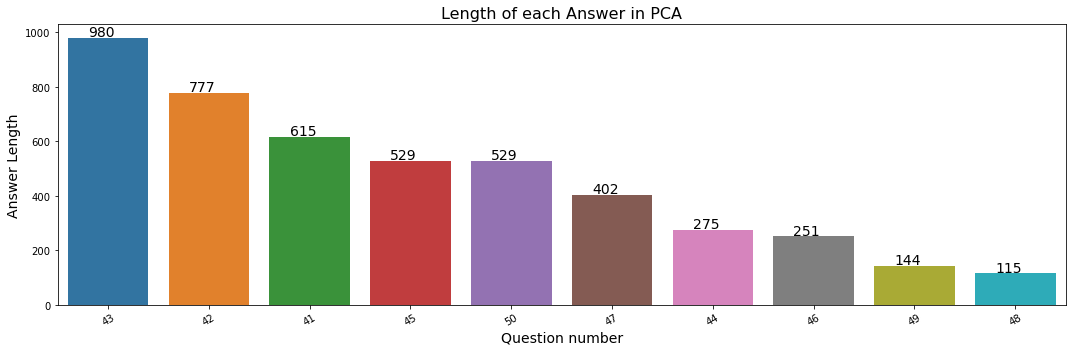

 
 Longest Answer in Random_forest is for Question no 56 with a length of 1278 

 Shortest Answer in Random_forest is for Question no 65 with a length of 100 



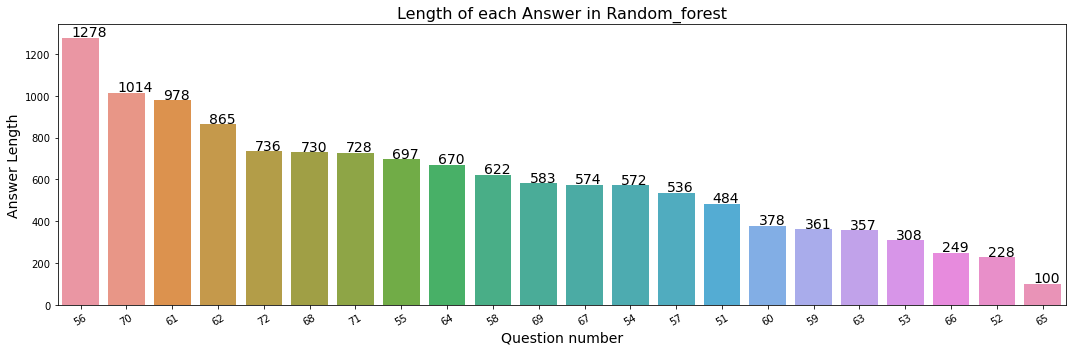

 
 Longest Answer in SVM is for Question no 80 with a length of 685 

 Shortest Answer in SVM is for Question no 87 with a length of 153 



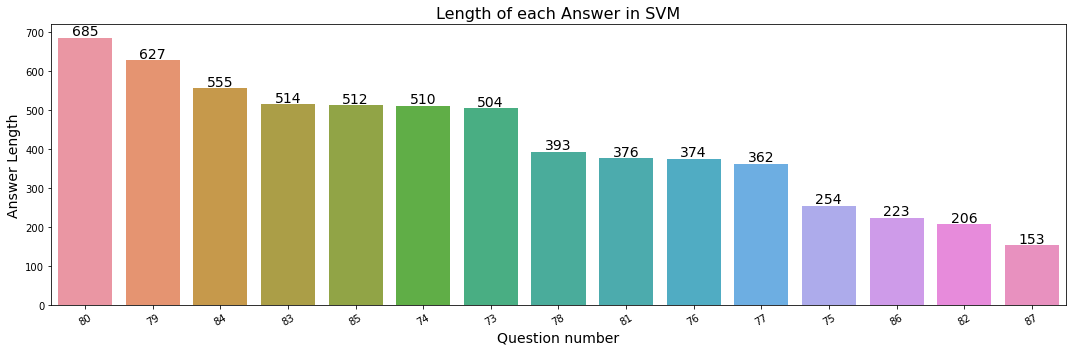

 
 Longest Answer in KNN is for Question no 100 with a length of 1241 

 Shortest Answer in KNN is for Question no 90 with a length of 154 



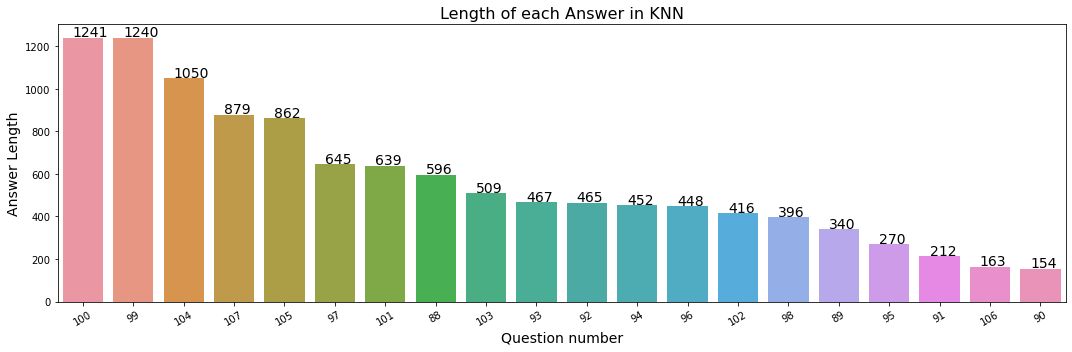

 
 Longest Answer in NAÏVE BAYES is for Question no 108 with a length of 1371 

 Shortest Answer in NAÏVE BAYES is for Question no 114 with a length of 350 



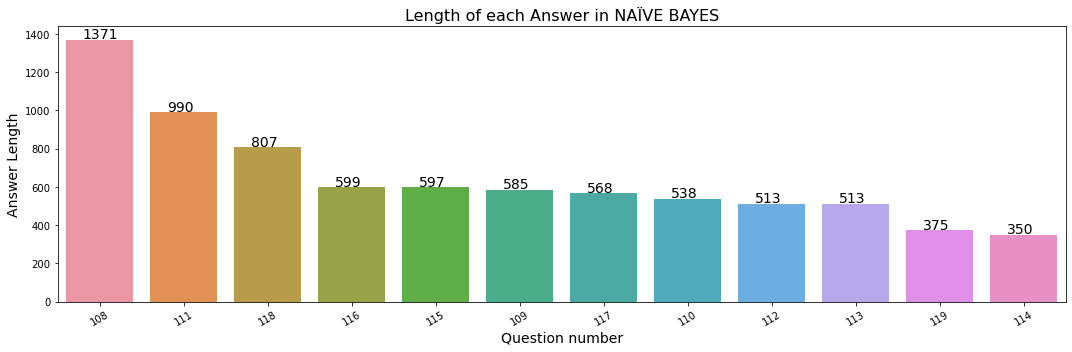

 
 Longest Answer in Decision tree is for Question no 143 with a length of 1381 

 Shortest Answer in Decision tree is for Question no 136 with a length of 186 



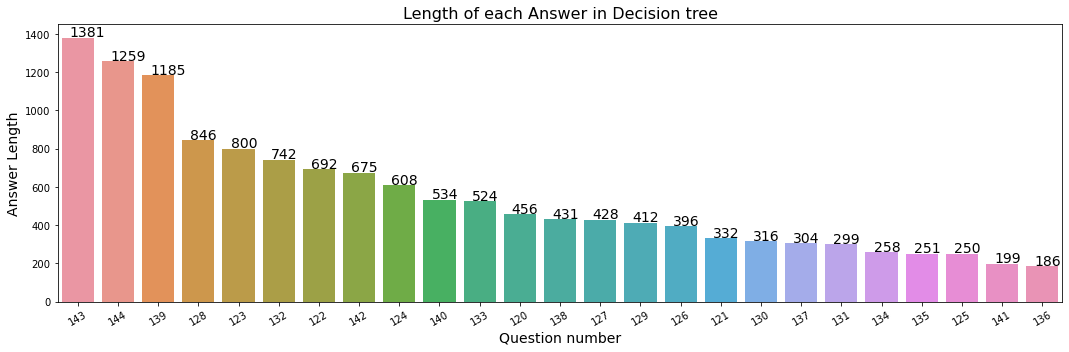

 
 Longest Answer in Logistic is for Question no 147 with a length of 3044 

 Shortest Answer in Logistic is for Question no 151 with a length of 237 



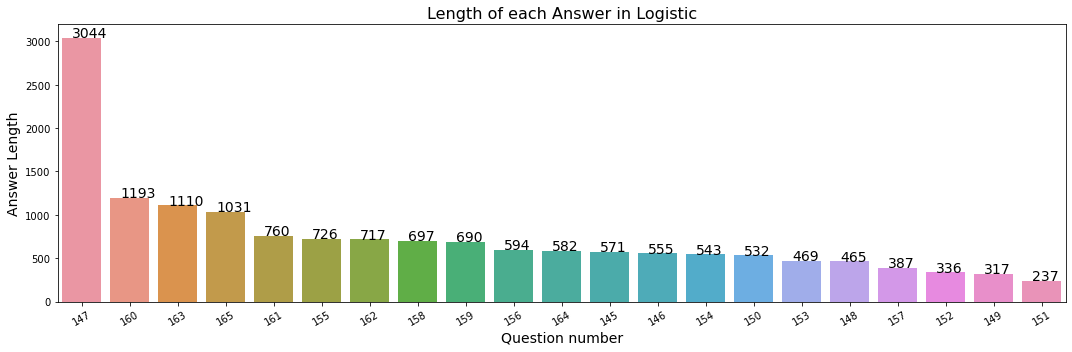

In [11]:
for label in data.Labels.unique():
    temp = EDAdata[EDAdata.Labels == label]
    temp = temp.sort_values(by = 'Answer_len', ascending = False)
    print(" ")
    print(f'\033[7m\033[92m\033[1m Longest Answer in {label} is for Question no {temp.iloc[0,4]} with a length of {temp.iloc[0,5]} \033[0m',end='\n\n')
    print(f'\033[1m\033[7m\033[92m Shortest Answer in {label} is for Question no {temp.iloc[-1,4]} with a length of {temp.iloc[-1,5]} \033[0m',end='\n\n')
    plt.figure(figsize=(15,5))
    sns.barplot(x = temp.Q_no.apply(str), y = temp.Answer_len)
    plt.xticks(rotation = 30)
    plt.title(f'Length of each Answer in {label}',fontsize = 16)
    plt.xlabel('Question number',fontsize = 14)
    plt.ylabel('Answer Length',fontsize = 14)
    for index,val in enumerate(temp.Answer_len):
        plt.text(index-.2,val+6,str(val),fontsize = 14)
    plt.tight_layout()
    plt.show()

## Data Cleaning

In [3]:
ans=data['Answers'].copy()
temp = pd.concat([data['Questions'],data['Answers']],axis = 0)
ans=pd.DataFrame(ans)

In [4]:
import re #regular expression
import string

def clean_text(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = text.strip().replace('\n', '')
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub("[0-9" "]+"," ",text)
    text = re.sub('[‘’“”…]', '', text)
    return text

clean = lambda x: clean_text(x)

ans['Answers'] = ans['Answers'].apply(clean)
ans

,Answers
0,clustering is an unsupervised machine learning...
1,hierarchical clustering ie an unsupervised mac...
2,the two different types of hierarchical cluste...
3,initially each data point is considered as an ...
4,in simple words divisive hierarchical clusteri...
...,...
161,in order to train a logistic regression model ...
162,in logistic regression we use the sigmoid func...
163,linear regressions cannot be used in the case ...
164,the advantages of the logistic regression are ...


In [5]:
#removing stopwords
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
stop = stopwords.words('english')
ans['Answers'] = ans['Answers'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

[nltk_data] Downloading package stopwords to C:\Users\MMM-
[nltk_data]     SM\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Bi-gram

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
#Bi-gram
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2), max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1],reverse=True)
    return words_freq[:n]


top2_words = get_top_n2_words(ans["Answers"], n=200) #top 200
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
top2_df.head(10)

,Bi-gram,Freq
0,logistic regression,45
1,data points,37
2,decision tree,29
3,random forest,27
4,decision trees,27
5,information gain,20
6,training data,18
7,knn algorithm,18
8,data point,17
9,gini impurity,16


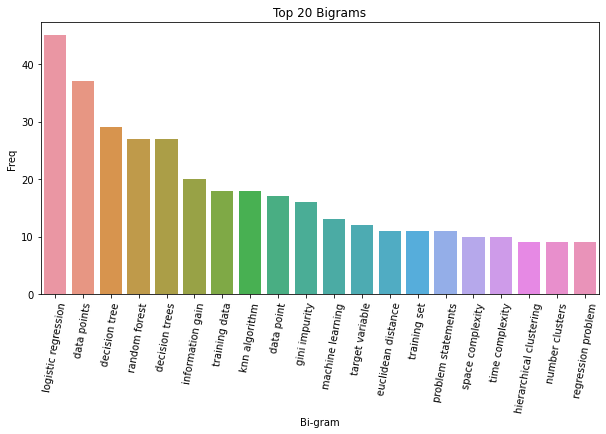

In [19]:
#Bi-gram plot
import matplotlib.pyplot as plt
import seaborn as sns
top20_bigram = top2_df.iloc[0:20,:]
fig = plt.figure(figsize = (10, 5))
plot=sns.barplot(x=top20_bigram["Bi-gram"],y=top20_bigram["Freq"])
plot.set_xticklabels(rotation=80,labels = top20_bigram["Bi-gram"])
plt.title('Top 20 Bigrams')
plt.show()

## Tri-gram

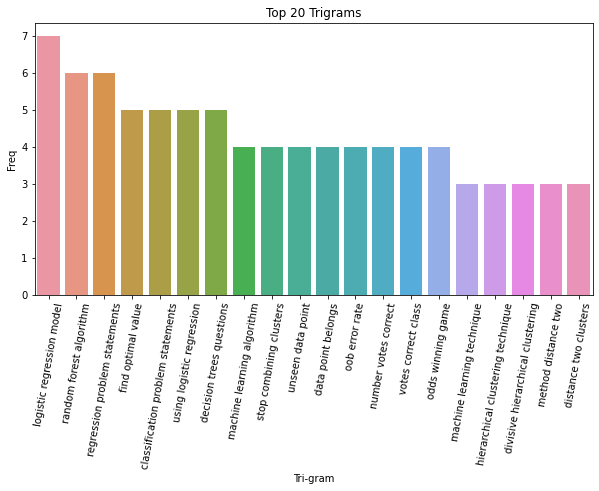

In [21]:
#Tri-gram
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), 
           max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]


top3_words = get_top_n3_words(ans["Answers"], n=200)
top3_df = pd.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Freq"]


#Tri-gram plot
import seaborn as sns
top20_trigram = top3_df.iloc[0:20,:]
fig = plt.figure(figsize = (10, 5))
plot=sns.barplot(x=top20_trigram["Tri-gram"],y=top20_trigram["Freq"])
plot.set_xticklabels(rotation=80,labels = top20_trigram["Tri-gram"])
plt.title('Top 20 Trigrams')
plt.show()

In [7]:
# remove both the leading and the trailing characters
data_ques=[x.strip() for x in data.Questions]
data_ans=[x.strip() for x in data.Answers]

# Create a list of Questions and Answers
text=[]
for ques in data_ques:
  ques=str(ques)
  text.append(ques)
for ans in data_ans:
  tans=str(ans)
  text.append(ans)
    
#Join the list into one text
corpus=' '.join(text)
corpus

"What do you mean by Clustering? What is a Hierarchical Clustering Algorithm? What are the various types of Hierarchical Clustering? Explain the Agglomerative Hierarchical Clustering algorithm with the help of an example. Describe the Divisive Hierarchical Clustering Algorithm in detail. Explain the different linkage methods used in the Hierarchical Clustering Algorithm. List down the pros and cons of complete and single linkages methods in the Hierarchical Clustering Algorithm. What is the group average method for calculating the similarity between two clusters for the Hierarchical Clustering Algorithm? Explain Ward's method for calculating the similarity between two clusters in the Hierarchical Clustering Algorithm. What is a dendrogram in Hierarchical Clustering Algorithm? Explain the working of dendrogram in the agglomerative Hierarchical Clustering Algorithm. Explain the different parts of dendrograms in the Hierarchical Clustering Algorithm. How can you find the clusters to have 

# # WordCloud

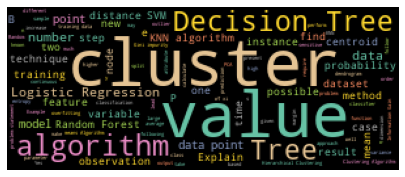

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(25,3))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");
    
    
# Generate wordcloud
stopwords = STOPWORDS
stopwords.add('used')
stopwords.add('use')
stopwords.add('using')
stopwords.add('will')
stopwords.add('need')
wordcloud = WordCloud(width = 300, height = 125, background_color='black', max_words=100,colormap='Set2',stopwords=stopwords).generate(corpus)
# Plot
plot_cloud(wordcloud)

# Rules Engine for Chat bot

In [3]:
flag = True
print(" ")
print('Hello There.....',end='\n\n')
print('''My name is \033[1m\033[93m"Sarvagnya"\033[0m, I will help you through your \033[4mDATA SCIENCE INTERVIEW PREPERATION\033[0m....''',
      end='\n\n')
print('Anytime you want to \033[1m"EXIT"\033[0m, please type \033[1m"x"\033[0m', end='\n\n')
print('Select any one \033[4mnumeric option\033[0m from below:  ',end='\n\n')

Topics = pd.Series(data.Labels.unique(),name = 'Topics')
print(Topics,end='\n\n')

while flag == True:
    user_response1 = str(input()).lower()
    try:    
        if user_response1 != 'x':

            a = Topics.values[int(user_response1)]
            print(" ")
            print(f'\033[1m\033[92mYOU SELECTED OPTION {user_response1} - \033[7m{a.upper()}\033[0m',end="\n\n")
            Questions_lst = data[data.Labels == a].loc[:,'Questions']
            pd.set_option('display.max_colwidth',80)
            print('\033[1m*Select ANY ONE NUMERIC OPTION from below :- (\033[4mOR type "#" for Topics OR type "x" to Exit)\033[0m',end='\n\n')
            print(Questions_lst,end='\n\n')
#             print('\t\033[1m\033[93mOR\033[0m',end='\n\n')
#             print('\033[1mType "#" to go to Topics list\033[0m',end='\n\n')
#             print('\t\033[1m\033[93mOR\033[0m',end='\n\n')
#             print('\033[1mType "x" to Exit\033[0m',end='\n\n')
            
            while flag == True:
                user_response2 = input()
                try:
                    if user_response2.lower() == 'x':
                        print('\n\033[7m THANKS FOR YOUR TIME, SEE YOU NEXT TIME.... \033[0m')
                        flag = False
                    elif user_response2 == '#':
                        print(" ")
                        print('\033[1m*Select ANY ONE NUMERIC OPTION from below :- (\033[4mOR type "x" to Exit)\033[0m',end='\n\n')
                        print(Topics,end='\n\n')
#                         print('\t\033[1m\033[93mOR\033[0m',end='\n\n')
#                         print('\033[1mType "x" to Exit\033[0m',end='\n\n')
                        break
                    elif user_response2 == '?':
                        print('\033[1m*Select ANY ONE NUMERIC OPTION from below :- (\033[4mOR type "#" for Topics OR type "x" to Exit)\033[0m',end='\n\n')
                        print(Questions_lst,end='\n\n')
#                         print('\t\033[1m\033[93m OR \033[0m',end='\n\n')
#                         print('\033[1mType "#" to go to Topics list\033[0m',end='\n\n')
#                         print('\t\033[1m\033[93mOR\033[0m',end='\n\n')
#                         print('\033[1mType "x" to Exit\033[0m',end='\n\n')

                    else:
                        b = Questions_lst[int(user_response2)]
                        print(f'\n\033[1mQUESTION {user_response2}:\033[0m \033[1m\033[93m\033[4m{b.upper()}\033[0m',end='\n\n')
                        print(f'\033[7mAnswer:\033[0m',end='\n\n')
                        print(f'{data.values[int(user_response2)][1]}',end='\n\n')
                        print(f'\033[1mType "?" to see the Questions list\033[0m',end='\n\n')
                        print('\t\033[1m\033[93mOR\033[0m',end='\n\n')
                        print('\033[1mType "#" to go to Topics list\033[0m',end='\n\n')                        
                        print('\t\033[1m\033[93mOR\033[0m',end='\n\n')
                        print('\033[1mType "x" to EXIT\033[0m',end='\n\n')

                except:
                    print('\n\033[1m** select a valid option **\033[0m', end = '\n\n')
        else:
            print('\n\033[7m THANKS FOR YOUR TIME, SEE YOU NEXT TIME.... \033[0m')
            flag = False
            
    except:
        print('\n\033[1m** Select a valid option.. **\033[0m', end = '\n\n')


 
Hello There.....

My name is "Sarvagnya", I will help you through your DATA SCIENCE INTERVIEW PREPERATION....

Anytime you want to "EXIT", please type "x"

Select any one numeric option from below:  

0      Hierarchial
1          k_means
2              PCA
3    Random_forest
4              SVM
5              KNN
6      NAÏVE BAYES
7    Decision tree
8         Logistic
Name: Topics, dtype: object

1
 
YOU SELECTED OPTION 1 - K_MEANS

*Select ANY ONE NUMERIC OPTION from below :- (OR type "#" for Topics OR type "x" to Exit)

20                                              What is K means Clustering Algorithm?
21                                          What is Lloyd's algorithm for Clustering?
22                             Is Feature Scaling required for the K means Algorithm?
23    Why do you prefer Euclidean distance over Manhattan distance in the K means ...
24    Why is the plot of the within-cluster sum of squares error (inertia) vs K in...
25           Which metrics can you use 

In [20]:
Topics.index = ["a",'b','c','d','e','f','g','h','i']
Topics

a      Hierarchial
b          k_means
c              PCA
d    Random_forest
e              SVM
f              KNN
g      NAÏVE BAYES
h    Decision tree
i         Logistic
Name: Topics, dtype: object

In [7]:
data.index = data.index+1
data

,Questions,Answers,Labels
1,What do you mean by Clustering?,Clustering is an unsupervised machine learning technique that groups similar...,Hierarchial
2,What is a Hierarchical Clustering Algorithm?,"Hierarchical Clustering i.e, an unsupervised machine learning algorithm is u...",Hierarchial
3,What are the various types of Hierarchical Clustering?,The two different types of Hierarchical Clustering technique are as follows:...,Hierarchial
4,Explain the Agglomerative Hierarchical Clustering algorithm with the help of...,"Initially, each data point is considered as an individual cluster in this te...",Hierarchial
5,Describe the Divisive Hierarchical Clustering Algorithm in detail.,"In simple words, Divisive Hierarchical Clustering is working in exactly the ...",Hierarchial
...,...,...,...
162,Discuss the Train complexity of Logistic Regression.,"In order to train a Logistic Regression model, we just need w and b to find ...",Logistic
163,Why can’t we use Mean Square Error (MSE) as a cost function for Logistic Re...,"In Logistic Regression, we use the sigmoid function to perform a non-linear ...",Logistic
164,Why can’t we use Linear Regression in place of Logistic Regression for Binar...,Linear Regressions cannot be used in the case of binary classification due t...,Logistic
165,What are the advantages of Logistic Regression?,The advantages of the logistic regression are as follows:\n\n1. Logistic Reg...,Logistic
